In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings

warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
retail_df = pd.read_excel('/content/drive/MyDrive/SSU_데이터_사이언스/Week13/Offline/Online_Retail.xlsx')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [50]:
temp_df = retail_df.copy()

In [51]:
temp_df['date'] = temp_df['InvoiceDate'].dt.date
temp_df['date']

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: date, Length: 541909, dtype: object

In [54]:
df2 = temp_df.groupby('date')[['Quantity']].sum()
df2

,Quantity
date,
2010-12-01,26814
2010-12-02,21023
2010-12-03,14830
2010-12-05,16395
2010-12-06,21419
...,...
2011-12-05,44119
2011-12-06,29026
2011-12-07,39612


In [55]:
temp_df['amount'] = temp_df['Quantity'] * temp_df['UnitPrice']

In [56]:
temp_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60


In [57]:
rfm_Df = temp_df.groupby('CustomerID')[['amount']].sum()

In [58]:
rfm_Df2 = rfm_Df.rename(columns = {'amount' : 'Monetary'})
rfm_Df2

,Monetary
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [59]:
rfm_Df2['Frequency'] = temp_df.groupby('CustomerID')[['InvoiceNo']].count()
rfm_Df2

,Monetary,Frequency
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,182
12348.0,1797.24,31
12349.0,1757.55,73
12350.0,334.40,17
...,...,...
18280.0,180.60,10
18281.0,80.82,7
18282.0,176.60,13


In [67]:
import datetime

In [91]:
temp_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [92]:
temp_df.groupby('CustomerID')[['date']].max()

,date
CustomerID,
12346.0,2011-01-18
12347.0,2011-12-07
12348.0,2011-09-25
12349.0,2011-11-21
12350.0,2011-02-02
...,...
18280.0,2011-03-07
18281.0,2011-06-12
18282.0,2011-12-02


In [97]:
rfm_Df2['Days'] = datetime.date(2011, 12, 9) - temp_df.groupby('CustomerID')['date'].max()

In [100]:
rfm_Df2['Days'] = rfm_Df2['Days'].dt.days

In [108]:
rfm_Df2

,Monetary,Frequency,Days
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,2
12348.0,1797.24,31,75
12349.0,1757.55,73,18
12350.0,334.40,17,310
...,...,...,...
18280.0,180.60,10,277
18281.0,80.82,7,180
18282.0,176.60,13,7


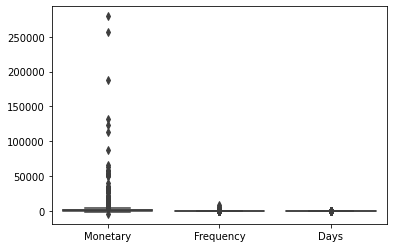

In [112]:
sns.boxplot(data = rfm_Df2)

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_df = scaler.fit_transform(rfm_Df2)
scaled_df

array([[-0.23100099, -0.3917197 ,  2.31656788],
       [ 0.29343167,  0.38265697, -0.88904975],
       [-0.01231622, -0.26695902, -0.16456032],
       ...,
       [-0.20951263, -0.34439668, -0.83942719],
       [ 0.02390005,  2.85205812, -0.87912524],
       [-0.00744423, -0.0991774 , -0.49206924]])

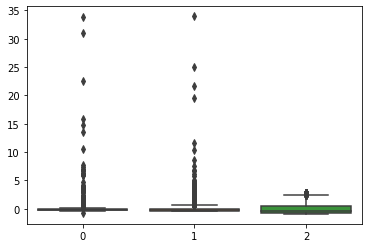

In [111]:
sns.boxplot(data = scaled_df)